In [10]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "heart_disease_health_indicators_BRFSS2015.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "alexteboul/heart-disease-health-indicators-dataset",
  file_path
)

In [11]:
TARGET = "HeartDiseaseorAttack"

# 2) Basic shape & preview
print("Shape:", df.shape)
display(df.head())

# 3) Data types
display(df.dtypes.to_frame("dtype"))

# 4) Missing values overview
missing_pct = df.isna().mean().sort_values(ascending=False).mul(100).round(2)
print("Missing values (%):")
display(missing_pct[missing_pct > 0])  # shows only columns with missing data

# 5) Target distribution (class balance)
class_counts = df[TARGET].value_counts().sort_index()
print("Target counts:\n", class_counts)
print("Target ratio:\n", (class_counts / class_counts.sum()).round(3))

Shape: (253680, 22)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


,dtype
HeartDiseaseorAttack,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
Diabetes,float64
PhysActivity,float64
Fruits,float64


Missing values (%):


Series([], dtype: float64)

Target counts:
 HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64
Target ratio:
 HeartDiseaseorAttack
0.0    0.906
1.0    0.094
Name: count, dtype: float64


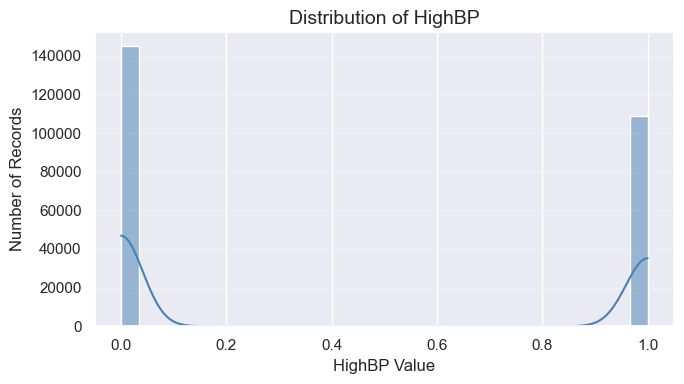

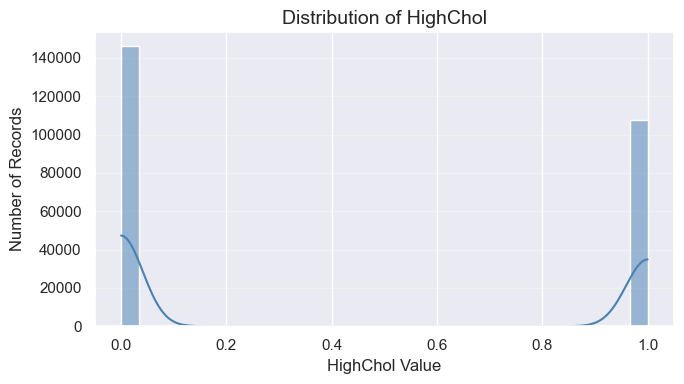

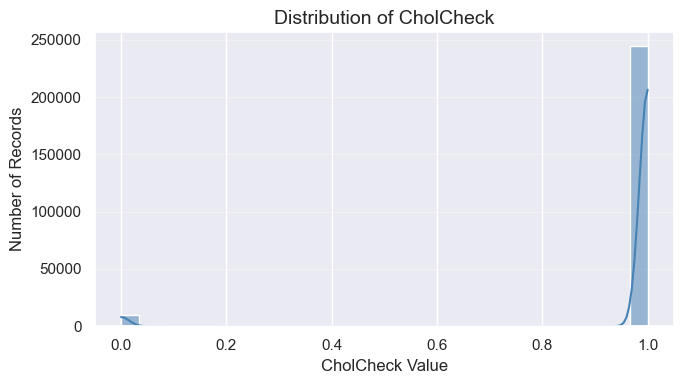

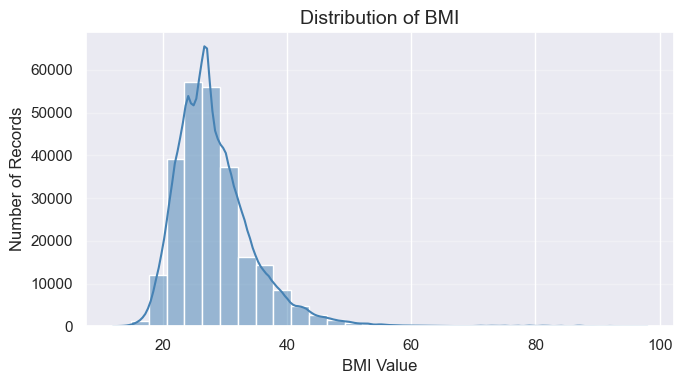

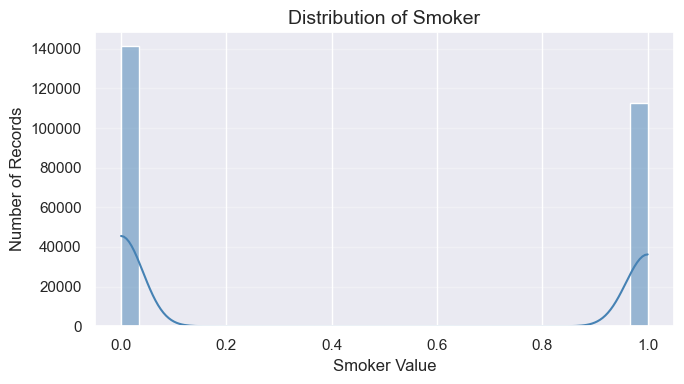

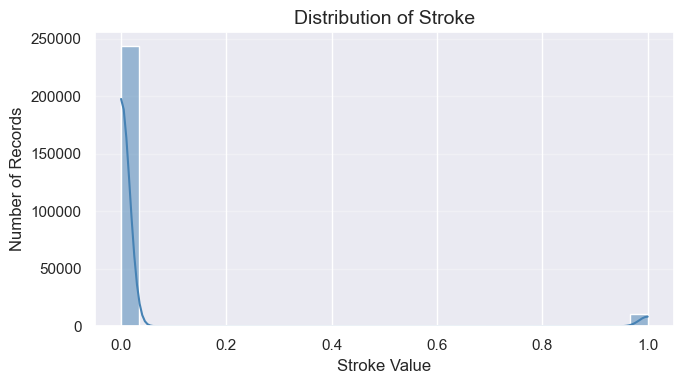

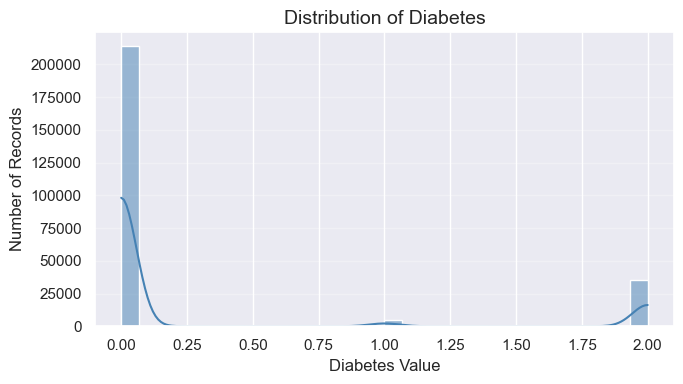

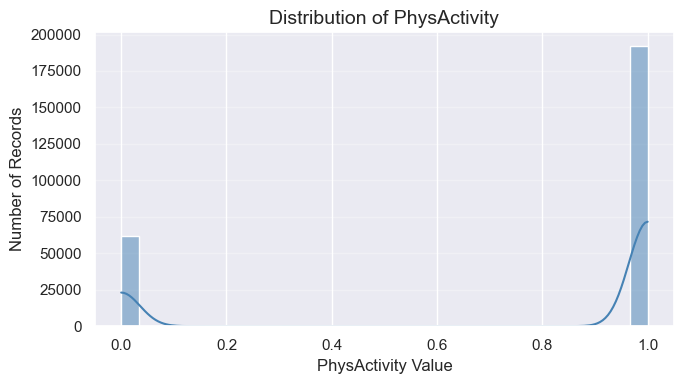

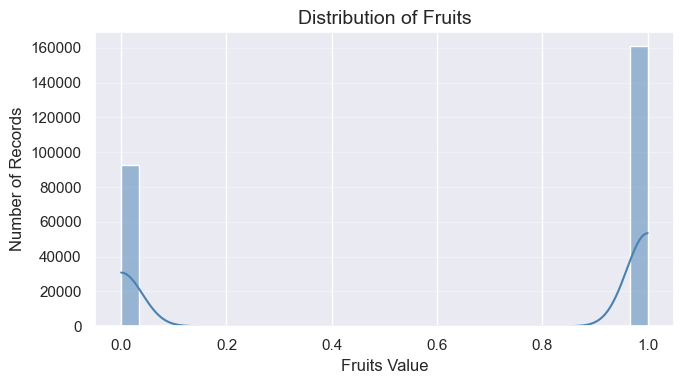

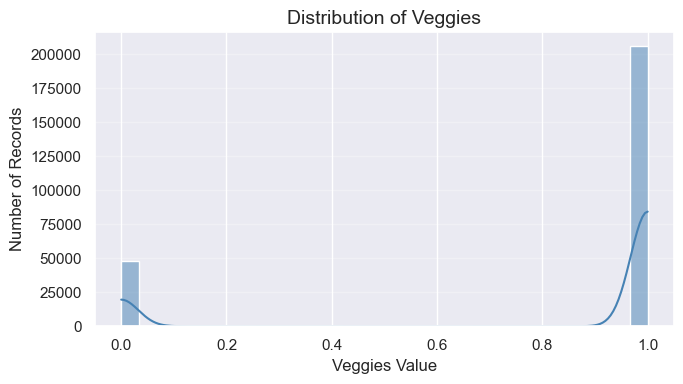

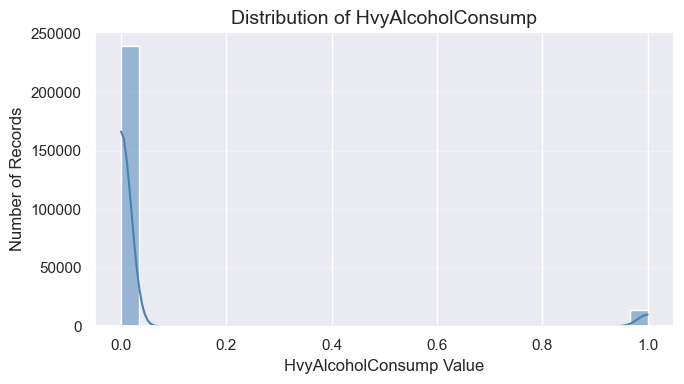

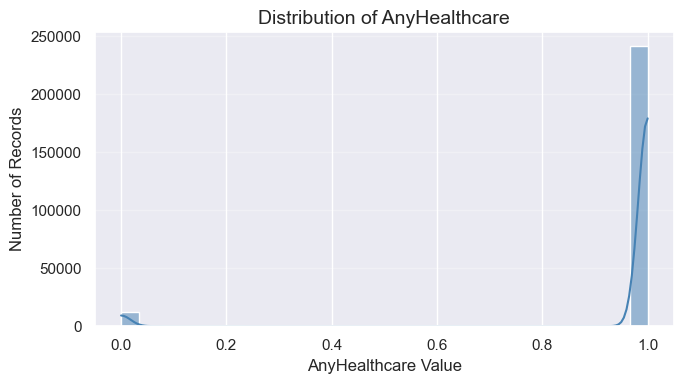

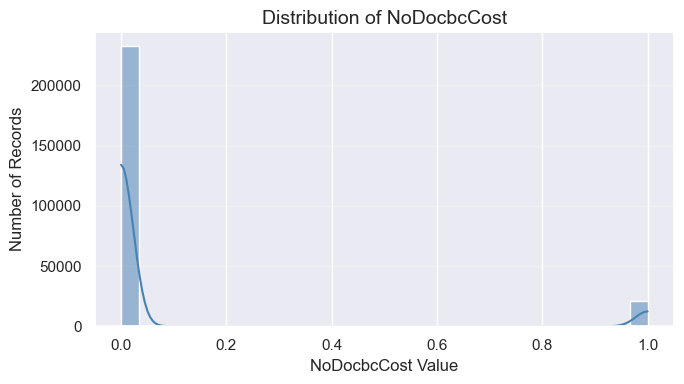

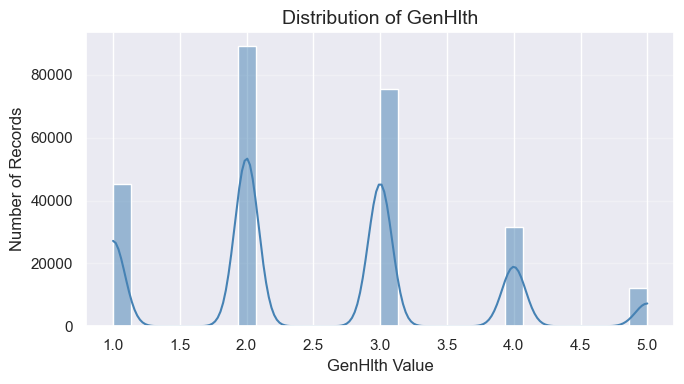

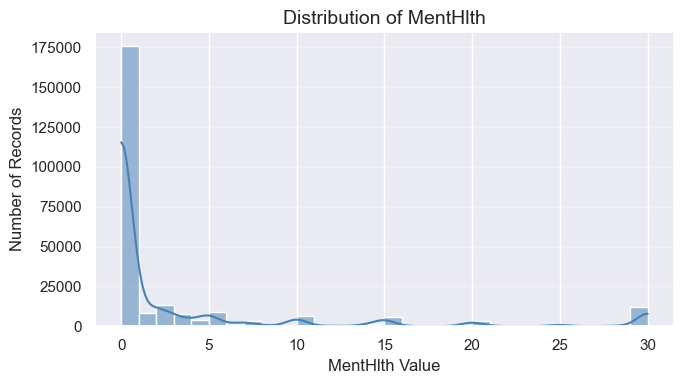

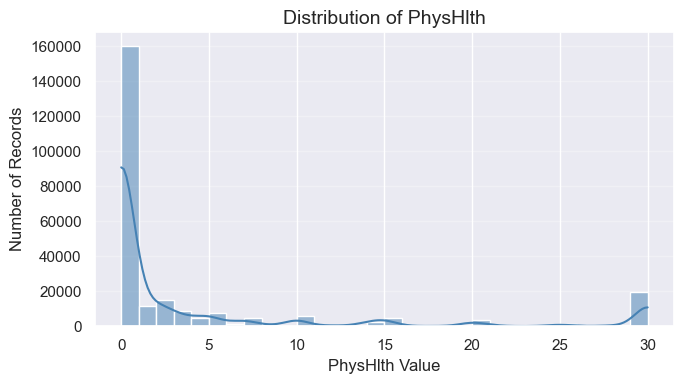

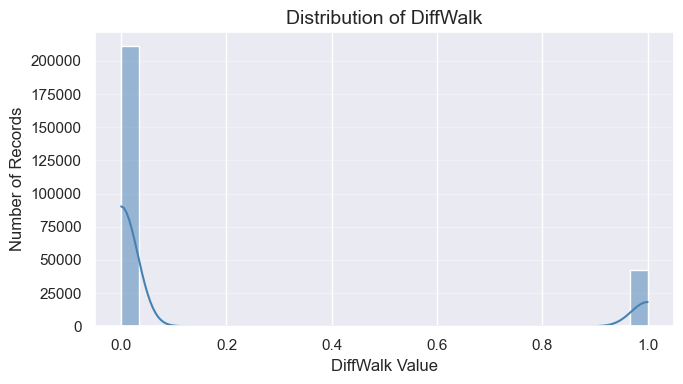

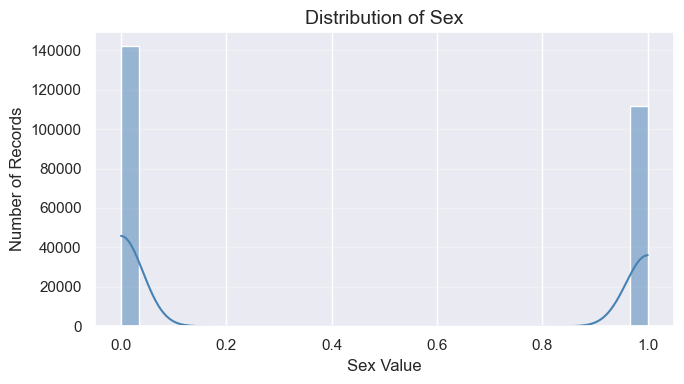

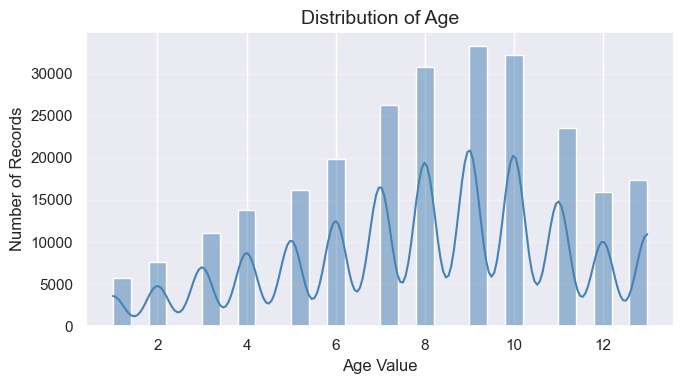

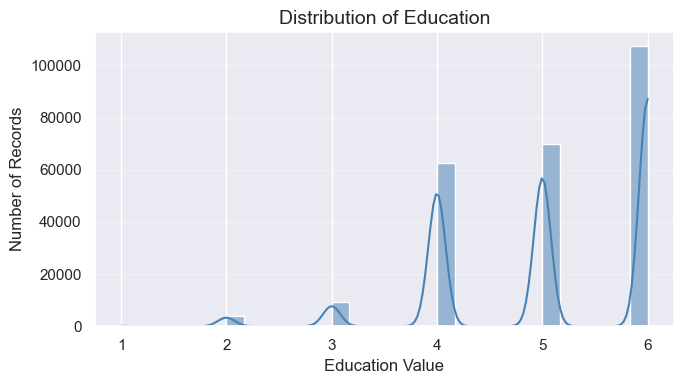

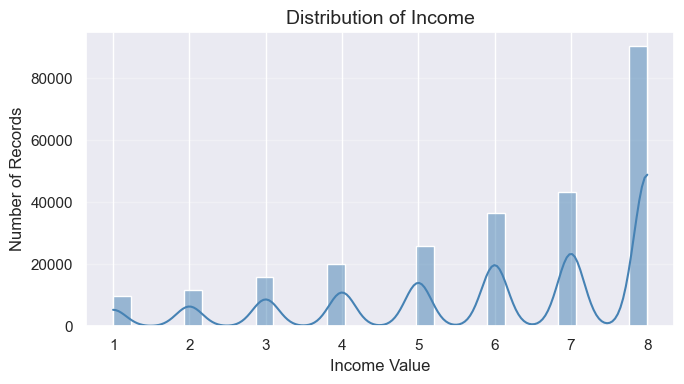

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through every numeric column in the DataFrame
for col in df.columns:
    # Skip the target column if you only want features
    if col == "HeartDiseaseorAttack":
        continue

    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(f"{col} Value", fontsize=12)
    plt.ylabel("Number of Records", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [18]:
import pandas as pd
import seaborn as sns

# Imbalance handling
from imblearn.over_sampling import SMOTE

pd.set_option("display.max_columns", None)
sns.set_theme()

Top correlations with HeartDiseaseorAttack:



,Correlation
HeartDiseaseorAttack,1.000000
GenHlth,0.258383
Age,0.221618
DiffWalk,0.212709
HighBP,0.209361
Stroke,0.203002
PhysHlth,0.181698
HighChol,0.180765
Diabetes,0.180272
Smoker,0.114441



Lowest correlations:



,Correlation
BMI,0.052904
CholCheck,0.044206
NoDocbcCost,0.031000
AnyHealthcare,0.018734
Fruits,-0.019790
HvyAlcoholConsump,-0.028991
Veggies,-0.039167
PhysActivity,-0.087299
Education,-0.099600
Income,-0.141011


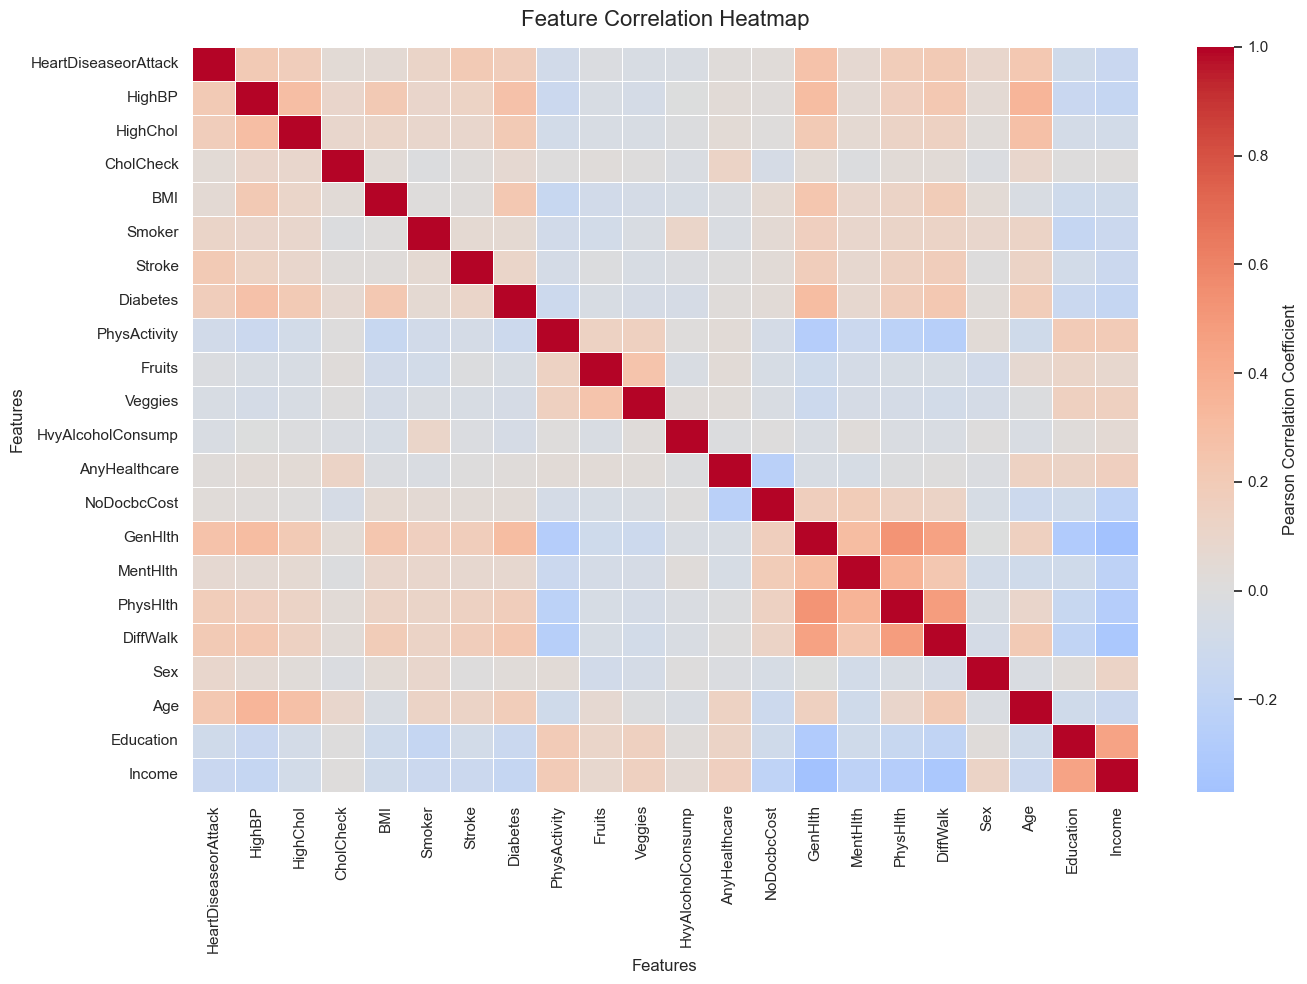

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation (Pearson by default)
corr_matrix = df.corr(numeric_only=True)

# Display the top correlations with the target
corr_target = corr_matrix["HeartDiseaseorAttack"].sort_values(ascending=False)
print("Top correlations with HeartDiseaseorAttack:\n")
display(corr_target.to_frame("Correlation").head(10))
print("\nLowest correlations:\n")
display(corr_target.to_frame("Correlation").tail(10))

# Heatmap for all numeric features
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=False,
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation Coefficient"}
)
plt.title("Feature Correlation Heatmap", fontsize=16, pad=15)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

# Define target variable
TARGET = "HeartDiseaseorAttack"

# Separate features and target
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

# Train-test split (80-20, stratified by target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (202944, 21)
Testing shape: (50736, 21)


In [21]:
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
TARGET = "HeartDiseaseorAttack"

# Split features and target
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

# Check for missing values
print("Missing values per column:")
print(df.isna().sum())

# Replace missing values (median imputation)
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

Missing values per column:
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("Scaled dataset shape:", X_scaled.shape)

Scaled dataset shape: (253680, 21)


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE only on the training data
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_bal.value_counts().to_dict())

Before SMOTE: {0: 183830, 1: 19114}
After SMOTE: {0: 183830, 1: 183830}


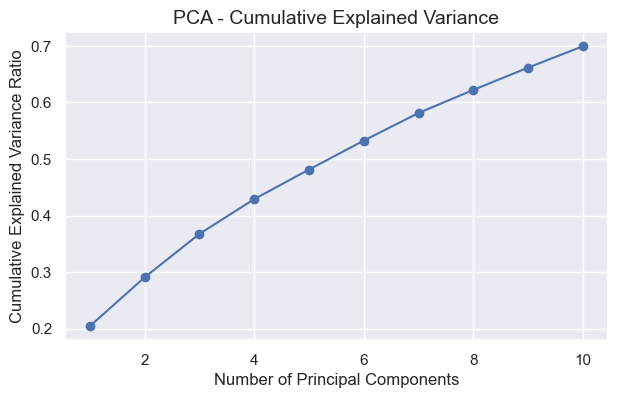

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_bal)

# Explained variance
explained = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(7,4))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title("PCA - Cumulative Explained Variance", fontsize=14)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)
plt.show()

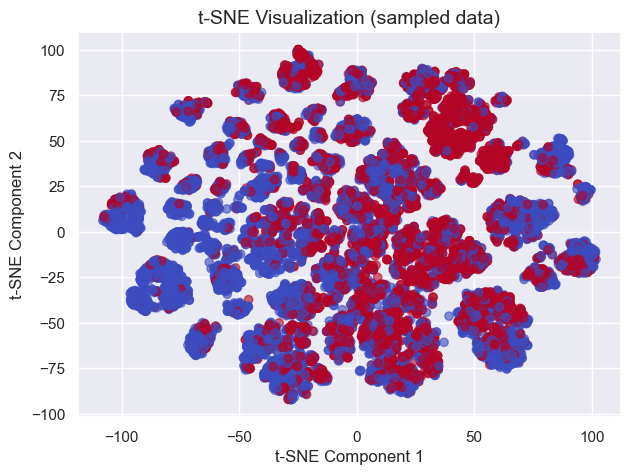

In [25]:
import numpy as np
from sklearn.manifold import TSNE

sample_size = 15000  # adjust smaller if still slow
idx = np.random.choice(len(X_train_bal), size=sample_size, replace=False)

X_sample = X_train_bal[idx]
y_sample = y_train_bal[idx]

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    init='pca',
    random_state=42
)

X_tsne_sample = tsne.fit_transform(X_sample)

plt.figure(figsize=(7,5))
plt.scatter(X_tsne_sample[:,0], X_tsne_sample[:,1], c=y_sample, cmap='coolwarm', alpha=0.6)
plt.title("t-SNE Visualization (sampled data)", fontsize=14)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()